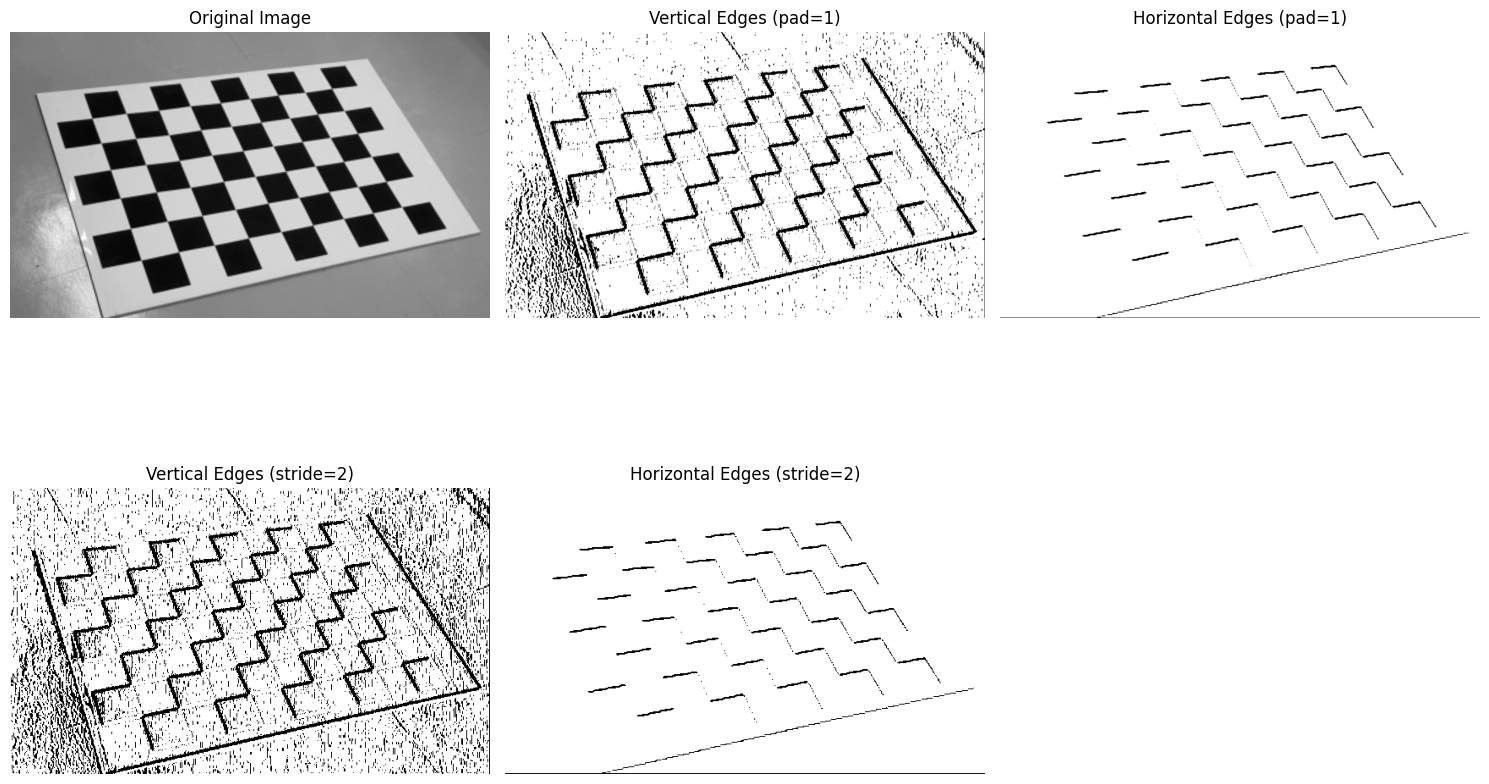

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Load a grayscale image and normalize
# ➤ Slide 5: Understanding image representation
image = cv2.imread('original.png', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) / 255.0  # Normalize to range [0, 1]

# Step 2: General Convolution Function
# ➤ Slide 8: C(j, k) = sum_l sum_m I(j + l, k + m) * K(l, m)
def convolve2d(image, kernel, padding=0, stride=1):
    # TODO 1: Flip kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))  # Flip kernel horizontally and vertically
    
    # Get image and kernel dimensions
    h_img, w_img = image.shape
    h_kernel, w_kernel = kernel.shape
    
    # TODO 2: Apply zero-padding if padding > 0
    if padding > 0:
        padded_img = np.zeros((h_img + 2 * padding, w_img + 2 * padding))
        padded_img[padding:padding + h_img, padding:padding + w_img] = image
    else:
        padded_img = image.copy()
    
    # TODO 3: Calculate output height and width
    h_padded, w_padded = padded_img.shape
    h_out = int((h_padded - h_kernel) / stride + 1)
    w_out = int((w_padded - w_kernel) / stride + 1)
    
    # Initialize output
    output = np.zeros((h_out, w_out))
    
    # TODO 4: Slide the kernel across the image with stride
    # TODO 5: At each position, compute the sum of element-wise multiplication
    for i in range(0, h_out):
        for j in range(0, w_out):
            # Extract the current region of interest
            i_start = i * stride
            j_start = j * stride
            roi = padded_img[i_start:i_start + h_kernel, j_start:j_start + w_kernel]
            
            # Compute convolution (sum of element-wise product)
            output[i, j] = np.sum(roi * kernel)
    
    return output

# Step 3: Define edge detection filters
# ➤ Slide 6: Vertical & Horizontal edge filters
vertical_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

horizontal_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
], dtype=np.float32)

# Step 4: Convolve image with filters (padding=1, stride=1)
# ➤ Slide 7: Padding helps preserve image size
vertical_edges = convolve2d(image, vertical_filter, padding=1)
horizontal_edges = convolve2d(image, horizontal_filter, padding=1)

# Try strided convolutions (padding=1, stride=2)
# ➤ Slide 8: Stride reduces spatial resolution
vertical_stride = convolve2d(image, vertical_filter, padding=1, stride=2)
horizontal_stride = convolve2d(image, horizontal_filter, padding=1, stride=2)

# Step 5: Visualization and Binarization function for black-and-white display
def binarize(img, threshold=0.5):
    img = img - np.min(img)
    if np.max(img) != 0:
        img = img / np.max(img)
    return (img > threshold).astype(np.float32)

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
binary_vertical = binarize(vertical_edges)
plt.title('Vertical Edges (pad=1)')
plt.imshow(binary_vertical, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
binary_horizontal = binarize(horizontal_edges)
plt.title('Horizontal Edges (pad=1)')
plt.imshow(binary_horizontal, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
binary_vertical_stride = binarize(vertical_stride)
plt.title('Vertical Edges (stride=2)')
plt.imshow(binary_vertical_stride, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
binary_horizontal_stride = binarize(horizontal_stride)
plt.title('Horizontal Edges (stride=2)')
plt.imshow(binary_horizontal_stride, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
